#Importing data

In [1]:

!pip install -q kaggle
from google.colab import files
files.upload()
#upload your kaggle.json kaggle api


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexaman","key":"3b733c390f877a077972ecce4b75822e"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d moltean/fruits

! mkdir fruits
! unzip fruits.zip -d fruits







Streaming output truncated to the last 5000 lines.
  inflating: fruits/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/127_100.jpg  
  in

Data link from Kaggle - > https://www.kaggle.com/moltean/fruits

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

train_path = "/content/fruits/fruits-360/Training/"
test_path = "/content/fruits/fruits-360/Test/"

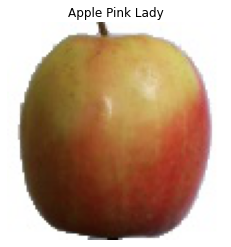

In [4]:
img = load_img(train_path + "Apple Pink Lady/0_100.jpg")
plt.imshow(img)
plt.title("Apple Pink Lady")
plt.axis("off")
plt.show()

In [5]:
shape_of_image = img_to_array(img)
print(shape_of_image.shape)



(100, 100, 3)


#Number of classes- Number of different types of fruits and vegetables

In [6]:
classes = glob(train_path + "/*")
number_of_class = len(classes)
print("Number of class : " , number_of_class)
class=glob(train_path + "/*")

Number of class :  131


#Changing shape of image arrays and zooming them 

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

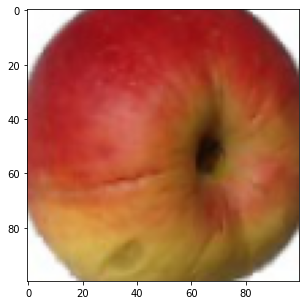

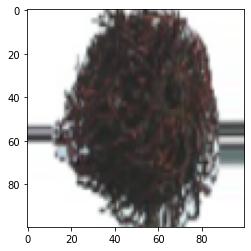

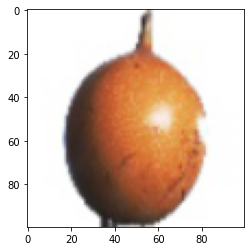

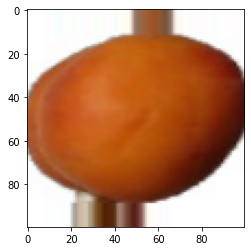

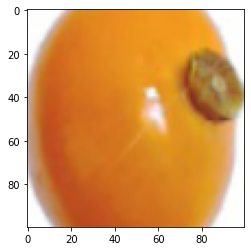

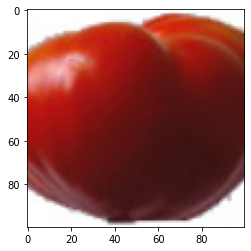

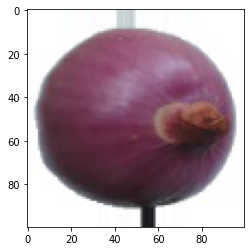

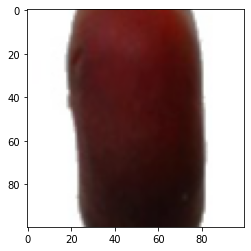

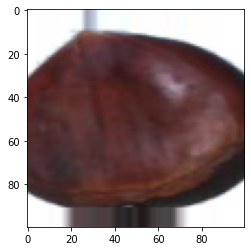

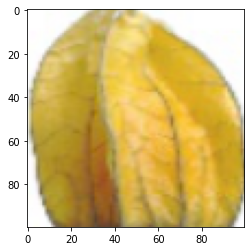

In [8]:
x,y = train_generator.next()
fig = plt.figure(figsize =(30,5))
for i in range(10):
 image = x[i]
 plt.imshow(image)
 plt.show()
    
   

#Custom CNN Architeture
no padding as edges have no information \
INPUT-CNN-MAXPOOL-CNN-MAXPOOL-CNN-MAXPOOL-FLATTEN-OUTPUT \



In [9]:
model = Sequential() 
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
batch_size = 32
number_of_batch = 1600 // batch_size
hist = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size
                   )
 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
50/50 [==============================] - 6s 122ms/step - loss: 4.6795 - accuracy: 0.0312 - val_loss: 4.1694 - val_accuracy: 0.0750
Epoch 2/100
50/50 [==============================] - 6s 120ms/step - loss: 3.7667 - accuracy: 0.1063 - val_loss: 3.4120 - val_accuracy: 0.1187
Epoch 3/100
50/50 [==============================] - 6s 124ms/step - loss: 2.9683 - accuracy: 0.2231 - val_loss: 2.4653 - val_accuracy: 0.3400
Epoch 4/100
50/50 [==============================] - 6s 120ms/step - loss: 2.4796 - accuracy: 0.3056 - val_loss: 2.0986 - val_accuracy: 0.3913
Epoch 5/100
50/50 [==============================] - 6s 120ms/step - loss: 2.0172 - accuracy: 0.4137 - val_loss: 1.5652 - val_accuracy: 0.5788
Epoch 6/100
50/50 [==============================] - 6s 119ms/step - loss: 1.7598 - accuracy: 0.4600 - val_loss: 1.1609 - val_accuracy: 0.6525
Epoch 7/100
50/50 [==============================] - 6s 120ms/step

#overfitting check

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


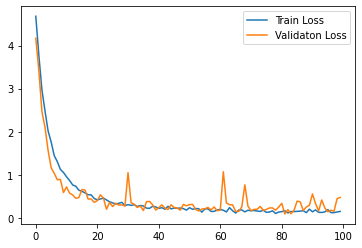

In [10]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

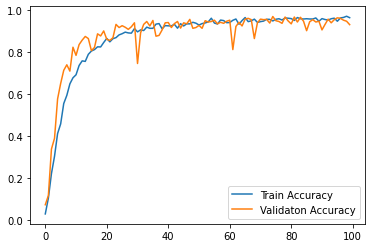

In [11]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

#VGG 13
 RESEARCH PAPER -> https://arxiv.org/pdf/1409.1556.pdf /


In [12]:
vggmodel = Sequential() 
vggmodel.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
vggmodel.add(Conv2D(64,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2, 2))

vggmodel.add(Conv2D(128,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(128,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))

vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))

vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))




vggmodel.add(Flatten())
vggmodel.add(Dense(1024,activation='relu'))
vggmodel.add(Dropout(0.5))
vggmodel.add(Dense(number_of_class,activation = 'softmax'))
vggmodel.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
batch_size = 32
number_of_batch = 1600 // batch_size
hist1 = vggmodel.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size
                   )
 

Epoch 1/100
50/50 [==============================] - 8s 166ms/step - loss: 5.3350 - accuracy: 0.0094 - val_loss: 4.8723 - val_accuracy: 0.0050
Epoch 2/100
50/50 [==============================] - 8s 162ms/step - loss: 4.9247 - accuracy: 0.0131 - val_loss: 4.8683 - val_accuracy: 0.0213
Epoch 3/100
50/50 [==============================] - 8s 162ms/step - loss: 4.9224 - accuracy: 0.0162 - val_loss: 4.8703 - val_accuracy: 0.0175
Epoch 4/100
50/50 [==============================] - 8s 162ms/step - loss: 4.9578 - accuracy: 0.0150 - val_loss: 4.7836 - val_accuracy: 0.0250
Epoch 5/100
50/50 [==============================] - 8s 162ms/step - loss: 4.8635 - accuracy: 0.0188 - val_loss: 4.5636 - val_accuracy: 0.0225
Epoch 6/100
50/50 [==============================] - 8s 161ms/step - loss: 4.6559 - accuracy: 0.0175 - val_loss: 4.6156 - val_accuracy: 0.0437
Epoch 7/100
50/50 [==============================] - 8s 163ms/step - loss: 4.5561 - accuracy: 0.0250 - val_loss: 4.5439 - val_accuracy: 0.0262

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


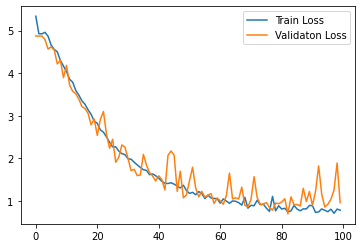

In [13]:
print(hist1.history.keys())
plt.plot(hist1.history["loss"],label = "Train Loss")
plt.plot(hist1.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

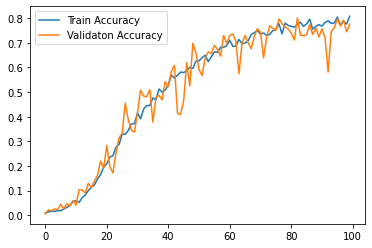

In [14]:
plt.figure()
plt.plot(hist1.history["accuracy"],label = "Train Accuracy")
plt.plot(hist1
         .history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

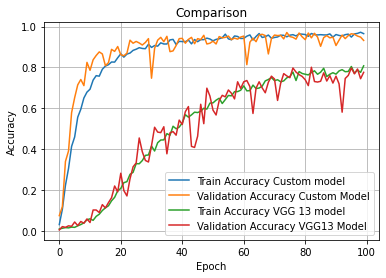

In [15]:
plt.grid()
plt.title("Comparison")
plt.plot(hist.history['accuracy'],
         label = 'Train Accuracy Custom model')
plt.plot(hist.history['val_accuracy'],  label = 'Validation Accuracy Custom Model')

plt.plot(hist1.history['accuracy'],
         label = 'Train Accuracy VGG 13 model')
plt.plot(hist1.history['val_accuracy'],  label = 'Validation Accuracy VGG13 Model')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.show()

#Custom CNN prediction results

In [173]:
x,y=train_generator.next()
y_pred=model.predict(x)
y_vggpred=vggmodel.predict(x)

In [184]:
classnamess=list(test_generator.class_indices.keys())

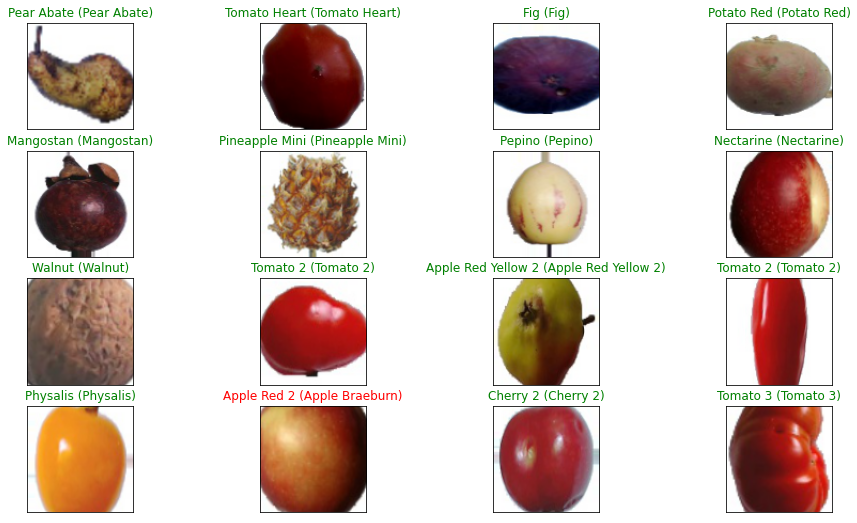

In [186]:
import numpy as np

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_pred[i])
    true_idx = np.argmax(y[i])
    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

#VGG 13  predictions results

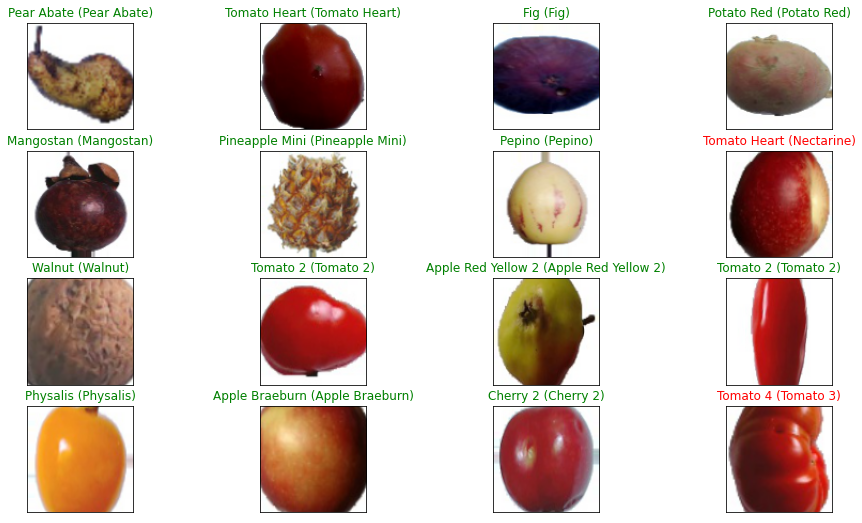

In [187]:
import numpy as np

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))
    pred_idx = np.argmax(y_vggpred[i])
    true_idx = np.argmax(y[i])
    ax.set_title("{} ({})".format(classnamess[pred_idx], classnamess[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))